In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
import os
import cv2
#os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
data = []
labels = []
classes = 43
cur_path = 'Train'

for i in tqdm(os.listdir(cur_path)):
    directory = cur_path + '/' + i
    for j in os.listdir(directory):
        img_path = directory+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (64,64), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

100%|██████████| 43/43 [00:05<00:00,  7.38it/s]

(39209, 64, 64, 3) (39209,)


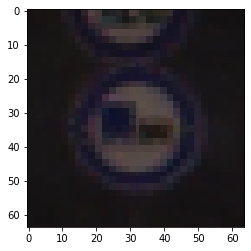

In [3]:
plt.imshow(data[3907])

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size= 0.25, random_state=21)

print((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

# converting the labels into one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)

((29406, 64, 64, 3), (29406,)) ((9803, 64, 64, 3), (9803,))


In [6]:
model = Sequential()
#1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(64,64,3), activation='relu', kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))

#4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))

#5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,), activation='relu'))

#2nd Fully Connected Layer
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

#3rd Fully Connected Layer
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         8

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #CCE: For Multiclass problems
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         8

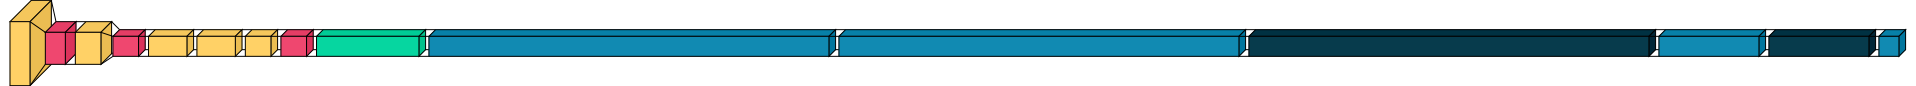

In [8]:
import visualkeras
visualkeras.layered_view(model)

In [9]:
epochs = 15
history = model.fit(x_train, y_train, 
                   batch_size=64,
                   epochs=epochs,
                   validation_data=(x_test, y_test))
    
    

Epoch 1/15
460/460 [==============================] - 262s 545ms/step - loss: 3.5436 - accuracy: 0.1482 - val_loss: 1.8489 - val_accuracy: 0.3754
Epoch 2/15
460/460 [==============================] - 251s 546ms/step - loss: 1.8856 - accuracy: 0.3632 - val_loss: 1.8359 - val_accuracy: 0.3818
Epoch 3/15
460/460 [==============================] - 245s 532ms/step - loss: 1.7105 - accuracy: 0.4120 - val_loss: 1.5402 - val_accuracy: 0.4647
Epoch 4/15
460/460 [==============================] - 273s 594ms/step - loss: 1.5428 - accuracy: 0.4677 - val_loss: 1.3705 - val_accuracy: 0.5287
Epoch 5/15
460/460 [==============================] - 271s 590ms/step - loss: 1.4290 - accuracy: 0.5100 - val_loss: 1.3838 - val_accuracy: 0.5420
Epoch 6/15
460/460 [==============================] - 268s 582ms/step - loss: 1.2991 - accuracy: 0.5611 - val_loss: 1.2263 - val_accuracy: 0.5827
Epoch 7/15
460/460 [==============================] - 257s 558ms/step - loss: 1.1733 - accuracy: 0.6021 - val_loss: 1.1203 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


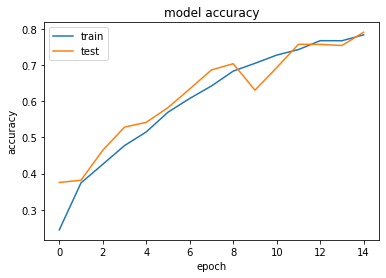

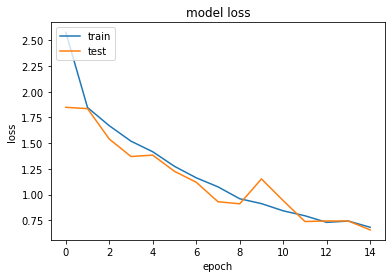

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.save('alexnet_model')

INFO:tensorflow:Assets written to: alexnet_model/assets


In [12]:
y_test = pd.read_csv('Test.csv')

In [13]:
labels_test = y_test['ClassId'].values
img_test = y_test['Path'].values
test_dir = ''
data = []
for img in img_test:
    img_path = os.path.join(test_dir, img)
    image = cv2.imread(img_path, -1)
    image = cv2.resize(image, (64,64), interpolation = cv2.INTER_NEAREST)
    data.append(np.array(image))
X_test = np.array(data)

In [16]:
from sklearn.metrics import accuracy_score
pred = np.argmax(model.predict(X_test), axis=-1)

print("Test accuracy: ", accuracy_score(labels_test, pred) * 100 )

Test accuracy:  64.2042755344418
